Project Name - Restaurant_Data_Analysis_and_Insights:_A_Comprehensive_Exploration

Industry - Cognifyz Technologies

Contribution - Individual

Member Name - Adhiraj Karjee

Level - 1

Project Summary:

In the first level of tasks for the Cognifyz Data Science Internship, I focused on performing an in-depth analysis of a restaurant dataset containing information such as restaurant names, city, address, locality, rating, price range, and more.

Level 1 Tasks:

1. Data Exploration and Preprocessing:
   - Conducted an initial examination of the dataset to understand its structure and dimensions.
   - Managed missing data across various columns to ensure data quality.
   - Converted data types as necessary for proper analysis.
   - Analyzed the distribution of the target variable, "Aggregate rating," and tackled any class imbalances.

2. Descriptive Analysis:
   - Calculated key statistical metrics like mean, median, and standard deviation for numerical columns.
   - Explored the distribution of categorical variables, such as "Country Code," "City," and "Cuisines."
   - Identified the most popular cuisines and cities with the highest number of restaurants.

3. Geospatial Analysis:
   - Visualized restaurant locations on maps using latitude and longitude information.
   - Analyzed the distribution of restaurants across various cities and countries.
   - Investigated potential correlations between restaurant locations and their ratings.

This notebook encapsulates all the tasks I completed during the internship’s first phase, providing insights into data exploration, preprocessing, statistical analysis, and geospatial aspects within the restaurant industry. It showcases my foundational knowledge of data science techniques and practices.

Task 1: Data Exploration and Preprocessing

Dataset loaded successfully!

Dataset Shape:
Rows: 9551, Columns: 21

Missing Values in Each Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


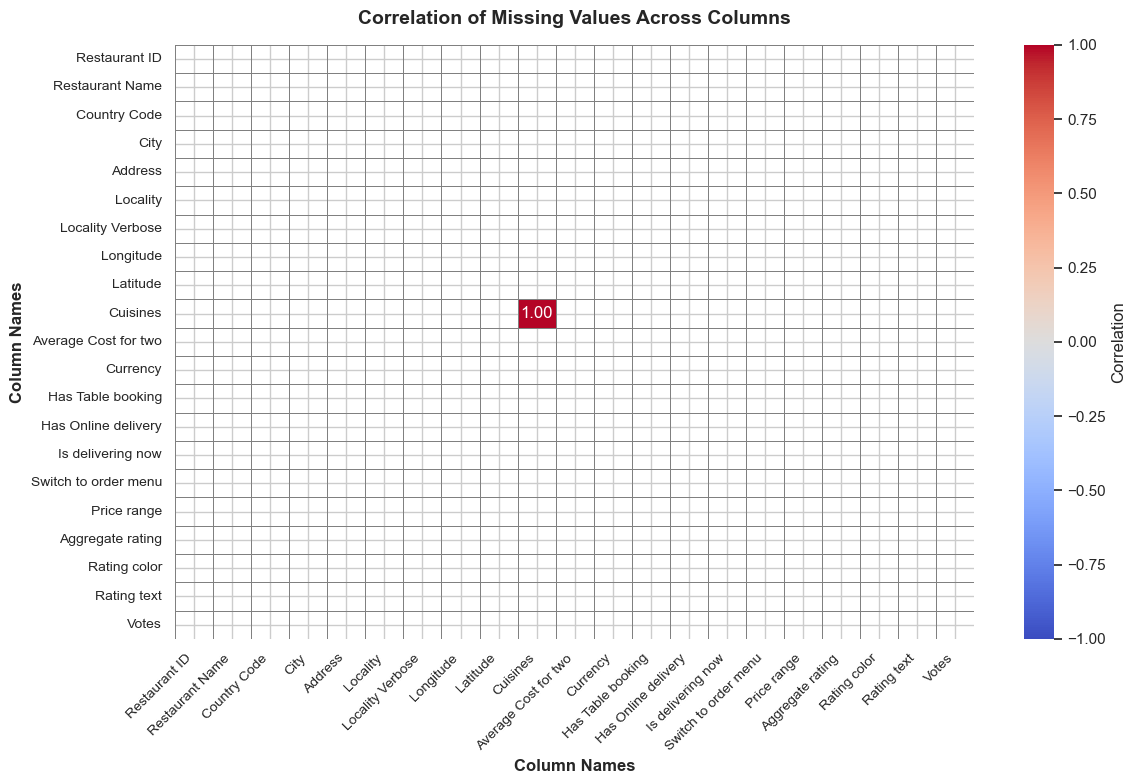


Handling Missing Values...
Missing values filled using median (numeric) and mode (categorical).

Missing Values After Handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Data Types Before Conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                f

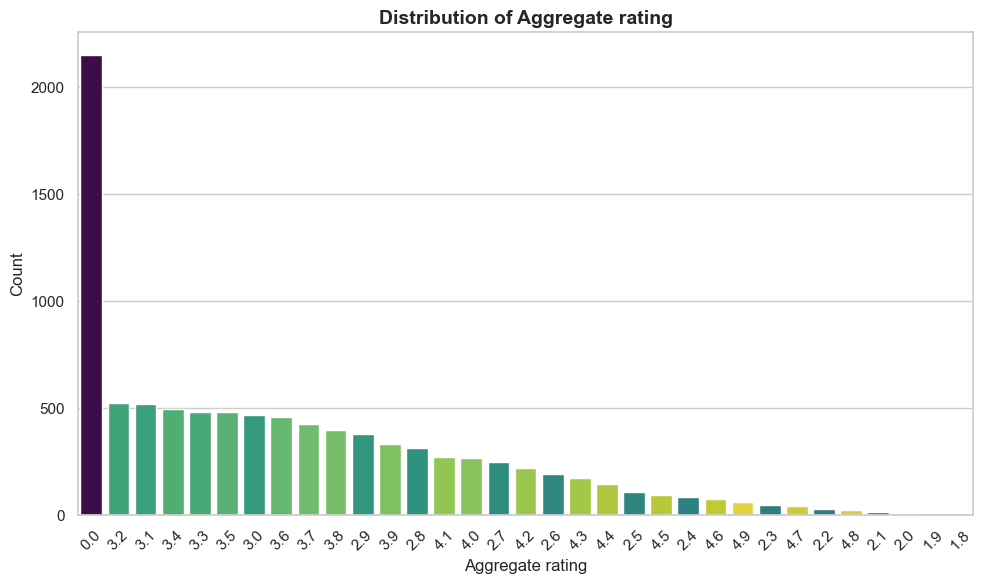


Class Imbalance (Proportions):
Aggregate rating
0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3    0.018218
4.4    0.015077
2.5    0.011517
4.5    0.009947
2.4    0.009109
4.6    0.008167
4.9    0.006387
2.3    0.004921
4.7    0.004397
2.2    0.002827
4.8    0.002618
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8    0.000105
Name: proportion, dtype: float64


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    data = None

if data is not None:
    # Display dataset shape
    print("\nDataset Shape:")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

    # Check for missing values
    print("\nMissing Values in Each Column:")
    missing_values = data.isnull().sum()
    print(missing_values)

    # Visualize missing values correlation
    if missing_values.sum() > 0:  # Proceed only if there are missing values
        plt.figure(figsize=(12, 8))
        sns.set_theme(style="whitegrid")

        # Heatmap of missing values correlation
        sns.heatmap(
            data.isnull().corr(), 
            vmin=-1, vmax=1, cmap="coolwarm", 
            annot=True, fmt=".2f", 
            linewidths=0.5, linecolor="gray", 
            cbar_kws={"label": "Correlation"}
        )

        plt.xticks(rotation=45, fontsize=10, ha="right")
        plt.yticks(fontsize=10)
        plt.xlabel("Column Names", fontsize=12, weight="bold")
        plt.ylabel("Column Names", fontsize=12, weight="bold")
        plt.title("Correlation of Missing Values Across Columns", fontsize=14, weight="bold", pad=15)
        plt.tight_layout()
        plt.show()

        # Handling missing values
        print("\nHandling Missing Values...")
        data.fillna(data.median(numeric_only=True), inplace=True)  # For numeric columns
        data.fillna(data.mode().iloc[0], inplace=True)  # For categorical columns
        print("Missing values filled using median (numeric) and mode (categorical).")

    print("\nMissing Values After Handling:")
    print(data.isnull().sum())

    # Data type conversion for optimization
    print("\nData Types Before Conversion:")
    print(data.dtypes)

    for column in data.select_dtypes(include=["object"]).columns:
        if data[column].nunique() < 20:  # Convert to 'category' if unique values are fewer
            data[column] = data[column].astype("category")

    print("\nData Types After Conversion:")
    print(data.dtypes)

    # Analyze the distribution of the target variable ("Aggregate rating")
    target_col = "Aggregate rating"
    if target_col in data.columns:
        print(f"\nTarget Variable Analysis: {target_col}")
        print(data[target_col].describe())

        # Visualize target variable distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=data, 
            x=target_col, 
            hue=target_col, 
            palette="viridis", 
            order=data[target_col].value_counts().index, 
            dodge=False, 
            legend=False
        )
        plt.title(f"Distribution of {target_col}", fontsize=14, weight="bold")
        plt.xlabel(target_col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Display class imbalance
        imbalance = data[target_col].value_counts(normalize=True)
        print("\nClass Imbalance (Proportions):")
        print(imbalance)
    else:
        print(f"\nError: Column '{target_col}' not found in the dataset.")
        print("\nAvailable Columns in the Dataset:")
        print(data.columns)
else:
    print("\nDataset not loaded. Exiting script.")



In [ ]:
Task 2: Descriptive Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    data = None

if data is not None:
    # Display dataset shape
    print("\nDataset Shape:")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

    # Check for missing values
    print("\nMissing Values in Each Column:")
    missing_values = data.isnull().sum()
    print(missing_values)

    # Visualize missing values correlation
    if missing_values.sum() > 0:  # Proceed only if there are missing values
        plt.figure(figsize=(12, 8))
        sns.set_theme(style="whitegrid")

        # Heatmap of missing values correlation
        sns.heatmap(
            data.isnull().corr(), 
            vmin=-1, vmax=1, cmap="coolwarm", 
            annot=True, fmt=".2f", 
            linewidths=0.5, linecolor="gray", 
            cbar_kws={"label": "Correlation"}
        )

        plt.xticks(rotation=45, fontsize=10, ha="right")
        plt.yticks(fontsize=10)
        plt.xlabel("Column Names", fontsize=12, weight="bold")
        plt.ylabel("Column Names", fontsize=12, weight="bold")
        plt.title("Correlation of Missing Values Across Columns", fontsize=14, weight="bold", pad=15)
        plt.tight_layout()
        plt.show()

        # Handling missing values
        print("\nHandling Missing Values...")
        data.fillna(data.median(numeric_only=True), inplace=True)  # For numeric columns
        data.fillna(data.mode().iloc[0], inplace=True)  # For categorical columns
        print("Missing values filled using median (numeric) and mode (categorical).")

    print("\nMissing Values After Handling:")
    print(data.isnull().sum())

    # Data type conversion for optimization
    print("\nData Types Before Conversion:")
    print(data.dtypes)

    for column in data.select_dtypes(include=["object"]).columns:
        if data[column].nunique() < 20:  # Convert to 'category' if unique values are fewer
            data[column] = data[column].astype("category")

    print("\nData Types After Conversion:")
    print(data.dtypes)

    # Analyze the distribution of the target variable ("Aggregate rating")
    target_col = "Aggregate rating"
    if target_col in data.columns:
        print(f"\nTarget Variable Analysis: {target_col}")
        print(data[target_col].describe())

        # Visualize target variable distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=data, 
            x=target_col, 
            hue=target_col, 
            palette="viridis", 
            order=data[target_col].value_counts().index, 
            dodge=False, 
            legend=False
        )
        plt.title(f"Distribution of {target_col}", fontsize=14, weight="bold")
        plt.xlabel(target_col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Display class imbalance
        imbalance = data[target_col].value_counts(normalize=True)
        print("\nClass Imbalance (Proportions):")
        print(imbalance)
    else:
        print(f"\nError: Column '{target_col}' not found in the dataset.")
        print("\nAvailable Columns in the Dataset:")
        print(data.columns)
else:
    print("\nDataset not loaded. Exiting script.")



Dataset successfully loaded!

Summary Statistics for Numerical Columns:
                       count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.

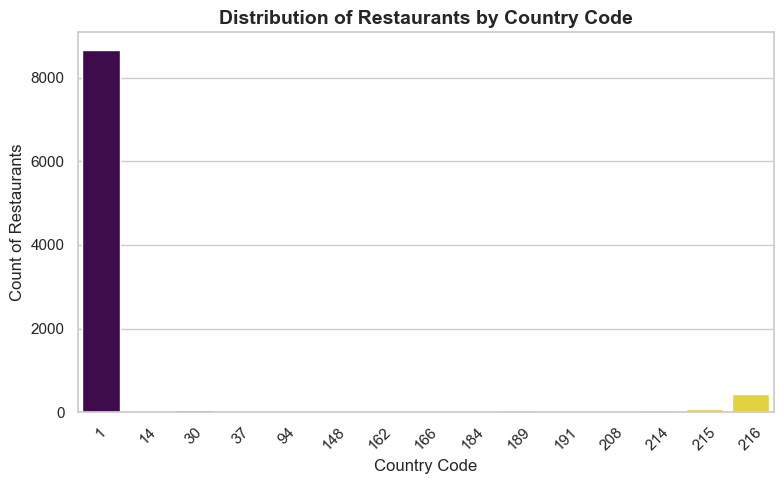


Top 10 Cuisines with the Highest Number of Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_17360\1216129500.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


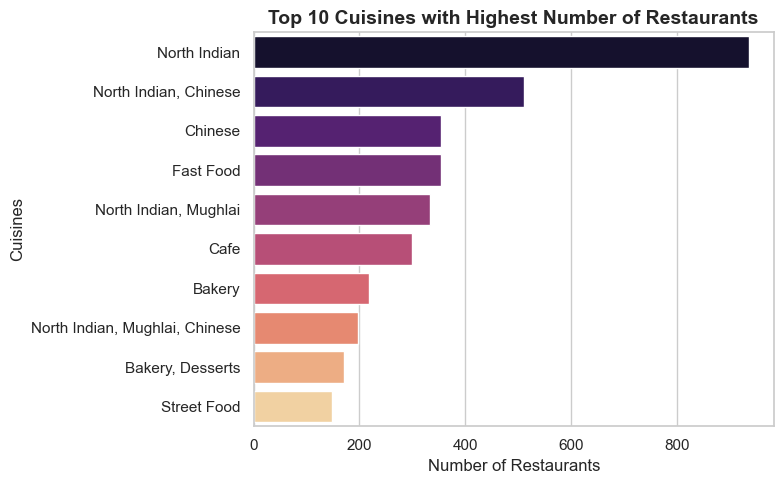

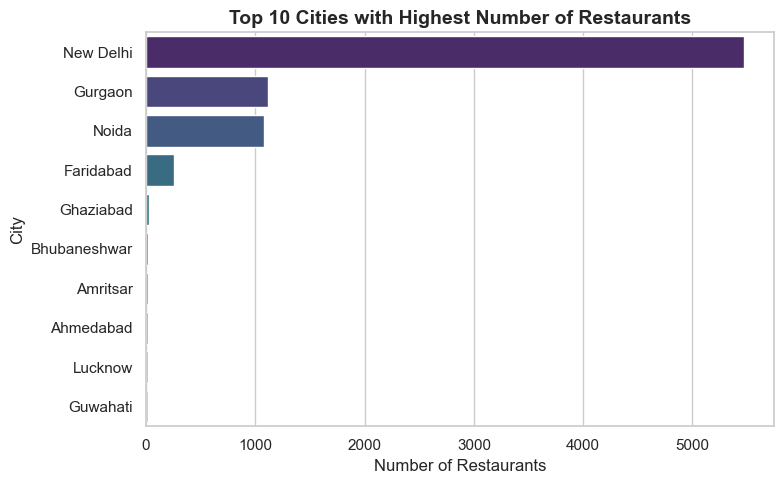

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset successfully loaded!")
except FileNotFoundError:
    print("Error: The file could not be located. Please verify the file path.")
    exit()

# Display basic statistical measures for numerical columns
print("\nSummary Statistics for Numerical Columns:")
numeric_data = data.select_dtypes(include=["number"])
print(numeric_data.describe().transpose())

# Display distribution for specific categorical variables
categorical_columns = ["Country Code", "City", "Cuisines"]
print("\nFrequency Distribution for Categorical Columns:")
for column in categorical_columns:
    if column in data.columns:
        print(f"\nColumn: {column}")
        print(data[column].value_counts())
    else:
        print(f"\nColumn '{column}' is not present in the dataset.")

# Visualization: Distribution of 'Country Code'
if "Country Code" in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        x=data["Country Code"], 
        hue=data["Country Code"],  # Assign `hue` to the same column
        palette="viridis", 
        dodge=False,  # Ensures no separation for `hue`
        legend=False  # Disable legend as it's redundant here
    )
    plt.title("Distribution of Restaurants by Country Code", fontsize=14, weight="bold")
    plt.xlabel("Country Code", fontsize=12)
    plt.ylabel("Count of Restaurants", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Top 10 Cuisines by number of restaurants
if "Cuisines" in data.columns:
    print("\nTop 10 Cuisines with the Highest Number of Restaurants:")
    top_cuisines = data["Cuisines"].value_counts().nlargest(10)
    print(top_cuisines)

    # Visualizing top cuisines
    plt.figure(figsize=(8, 5))
    sns.barplot(
        y=top_cuisines.index, 
        x=top_cuisines.values, 
        palette="magma"
    )
    plt.title("Top 10 Cuisines with Highest Number of Restaurants", fontsize=14, weight="bold")
    plt.xlabel("Number of Restaurants", fontsize=12)
    plt.ylabel("Cuisines", fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization: Top 10 Cities with Highest Number of Restaurants
if "City" in data.columns:
    top_cities = data["City"].value_counts().head(10)
    plt.figure(figsize=(8, 5))
    
    # Create barplot with hue assigned to the y variable
    sns.barplot(
        y=top_cities.index, 
        x=top_cities.values, 
        palette="viridis", 
        hue=top_cities.index,  # Assign y variable to hue to resolve the warning
        dodge=False,  # Avoid bar separation
        legend=False  # Explicitly disable legend
    )
    
    # Add labels and title
    plt.title("Top 10 Cities with Highest Number of Restaurants", fontsize=14, weight="bold")
    plt.xlabel("Number of Restaurants", fontsize=12)
    plt.ylabel("City", fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    print("\nThe 'City' column is not found in the dataset.")


In [ ]:
Task 3: Geospatial Analysis

In [13]:
!conda install folium -y

import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Load the dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Locations of restaurants on a map using latitude and longitude information
if {"Latitude", "Longitude"}.issubset(df.columns):
    print("\nGenerating a geospatial map of restaurant locations...")

    # Create Point geometry from latitude and longitude using Shapely
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
    )

    # Create a base map of the world using Geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Plot the restaurant locations on the map
    ax = world.plot("continent", legend=True, figsize=(14, 12))
    gdf.plot(ax=ax, marker='o', color='red', markersize=15)

    # Show the map
    plt.title("Geospatial Distribution of Restaurants")
    plt.show()
else:
    print("\nError: Columns 'Latitude' and 'Longitude' are required for geospatial visualization.")

# Distribution of restaurants across different cities or countries
if "City" in df.columns:
    print("\nDistribution of Restaurants by City:")
    # Set plot size and create the distribution plot
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y=df['City'], 
        order=df['City'].value_counts().iloc[:10].index, 
        palette="viridis"
    )

    # Set Labels
    plt.xlabel('Number of Restaurants')
    plt.ylabel('City')
    plt.title('Distribution of Restaurants Across Cities')
    plt.tight_layout()
    plt.show()

if "Country Code" in df.columns:
    print("\nDistribution of Restaurants by Country:")
    # Set plot size and create the distribution plot for top 10 countries
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y=df['Country Code'], 
        order=df['Country Code'].value_counts().iloc[:10].index, 
        palette="coolwarm"
    )

    # Set Labels
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Country Code')
    plt.title('Distribution of Restaurants Across Countries')
    plt.tight_layout()
    plt.show()

# Checking correlation between the restaurant's location and its rating
if {"Latitude", "Longitude", "Aggregate rating"}.issubset(df.columns):
    print("\nAnalyzing correlation between location and rating...")

    # Calculate the correlation between latitude, longitude, and ratings
    correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

    # Set plot size and create a heatmap for correlation
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f", 
        linewidths=0.5, 
        linecolor='black'
    )

    # Set Title
    plt.title("Correlation Between Restaurant's Location and Rating")
    plt.tight_layout()
    plt.show()

else:
    print("\nError: Columns 'Latitude', 'Longitude', and 'Aggregate rating' are required for correlation analysis.")


Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |  py312haa95532_0          49 KB
    conda-24.11.0              |  py312haa95532_0         1.2 MB
    folium-0.14.0              |  py312haa95532_0         124 KB
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  branca             pkgs/main/win-64::branca-0.6.0-py312haa95532_0 
  folium             pkgs/main/win-64::folium-0.14.0-py312haa95532_0 

The following packages will be UPDATED:

  conda                              24.9.1-py312haa95532_0 --> 24.11.0-py31

In [38]:
pip install shapely


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.4 MB 326.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 756.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 1.7 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 2.8 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 2.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------

In [40]:
pip install geopandas


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/323.6 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 92.2/323.6 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 184.3/323.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  317.4/323.6 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.4/16.2 MB 11.2 MB/s eta 0:00:02
   - -------------------------------------- 0.5/16.2 MB 5.9 MB/s eta 0:00:03
   - -------------------------------------- 0.5/16.2 MB 6.3 MB/s eta 0:00:03
   - -------------------------------------- 0.5/16.2 MB 6.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/16.2 MB 4.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/16.2 MB 3.5 MB/s eta 0:00:0

In [42]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Load the dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Locations of restaurants on a map using latitude and longitude information
if {"Latitude", "Longitude"}.issubset(df.columns):
    print("\nGenerating a geospatial map of restaurant locations...")

    # Create Point geometry from latitude and longitude using Shapely
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
    )

    # Create a base map of the world using Geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Plot the restaurant locations on the map
    ax = world.plot("continent", legend=True, figsize=(14, 12))
    gdf.plot(ax=ax, marker='o', color='red', markersize=15)

    # Show the map
    plt.title("Geospatial Distribution of Restaurants")
    plt.show()
else:
    print("\nError: Columns 'Latitude' and 'Longitude' are required for geospatial visualization.")

# Distribution of restaurants across different cities or countries
if "City" in df.columns:
    print("\nDistribution of Restaurants by City:")
    # Set plot size and create the distribution plot
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y=df['City'], 
        order=df['City'].value_counts().iloc[:10].index, 
        palette="viridis"
    )

    # Set Labels
    plt.xlabel('Number of Restaurants')
    plt.ylabel('City')
    plt.title('Distribution of Restaurants Across Cities')
    plt.tight_layout()
    plt.show()

if "Country Code" in df.columns:
    print("\nDistribution of Restaurants by Country:")
    # Set plot size and create the distribution plot for top 10 countries
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y=df['Country Code'], 
        order=df['Country Code'].value_counts().iloc[:10].index, 
        palette="coolwarm"
    )

    # Set Labels
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Country Code')
    plt.title('Distribution of Restaurants Across Countries')
    plt.tight_layout()
    plt.show()

# Checking correlation between the restaurant's location and its rating
if {"Latitude", "Longitude", "Aggregate rating"}.issubset(df.columns):
    print("\nAnalyzing correlation between location and rating...")

    # Calculate the correlation between latitude, longitude, and ratings
    correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

    # Set plot size and create a heatmap for correlation
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f", 
        linewidths=0.5, 
        linecolor='black'
    )

    # Set Title
    plt.title("Correlation Between Restaurant's Location and Rating")
    plt.tight_layout()
    plt.show()

else:
    print("\nError: Columns 'Latitude', 'Longitude', and 'Aggregate rating' are required for correlation analysis.")


Dataset loaded successfully!

Generating a geospatial map of restaurant locations...


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

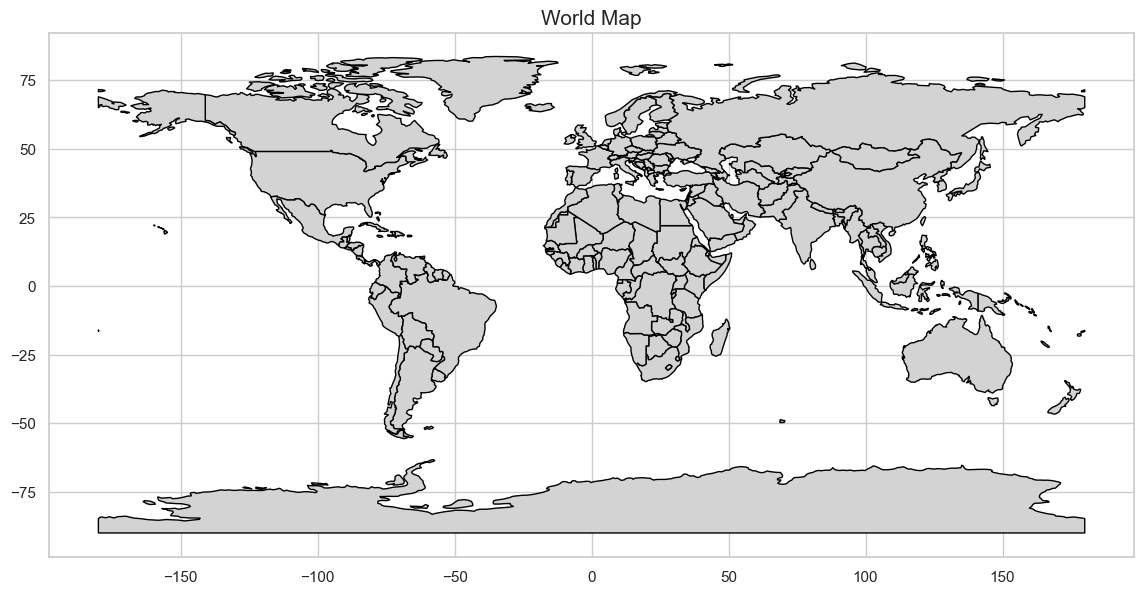

In [44]:
import zipfile
import geopandas as gpd
import os
import matplotlib.pyplot as plt

# Define the path to the zip file and the extraction directory
zip_file_path = r"C:\Users\HP\Downloads\110m_cultural.zip"
extract_dir = r"C:\Users\HP\Downloads\110m_cultural"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Get the path of the extracted shapefile
shapefile_path = os.path.join(extract_dir, "ne_110m_admin_0_countries.shp")

# Load the shapefile into a GeoDataFrame
world = gpd.read_file(shapefile_path)

# Plot the world map
fig, ax = plt.subplots(figsize=(14, 12))
world.plot(ax=ax, color='lightgray', edgecolor='black')
ax.set_title("World Map", fontsize=15)
plt.show()


Dataset loaded successfully!

Generating a map of restaurant locations...
Map saved as 'restaurants_map.html'. Open it in a browser to view.

Distribution of Restaurants by City:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_17360\3900049673.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data["City"], order=city_counts.index, palette="viridis")


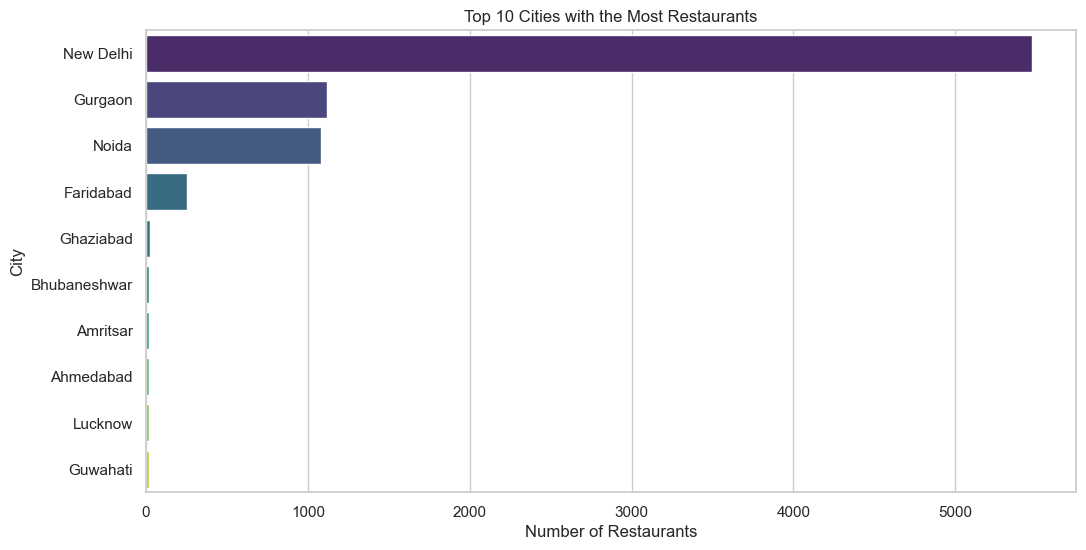


Distribution of Restaurants by Country:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_17360\3900049673.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data["Country Code"], order=country_counts.index, palette="coolwarm")


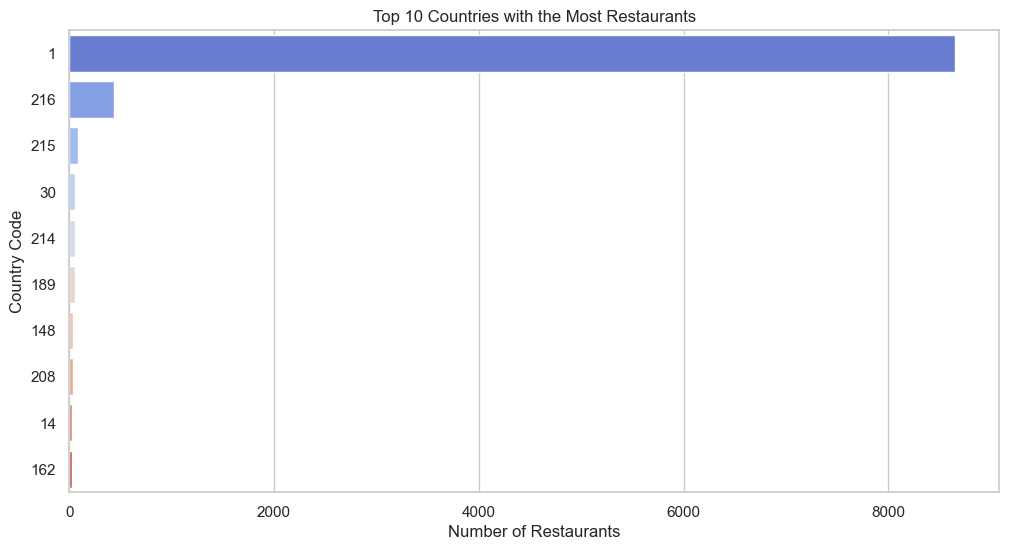


Analyzing correlation between location and rating...


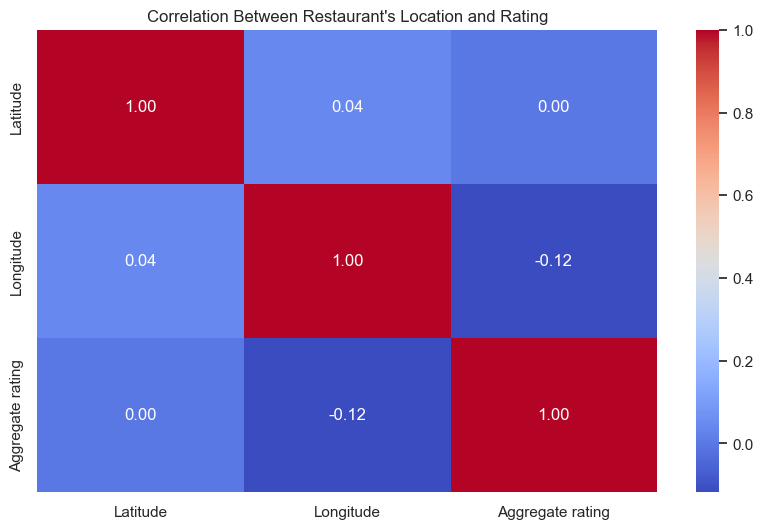

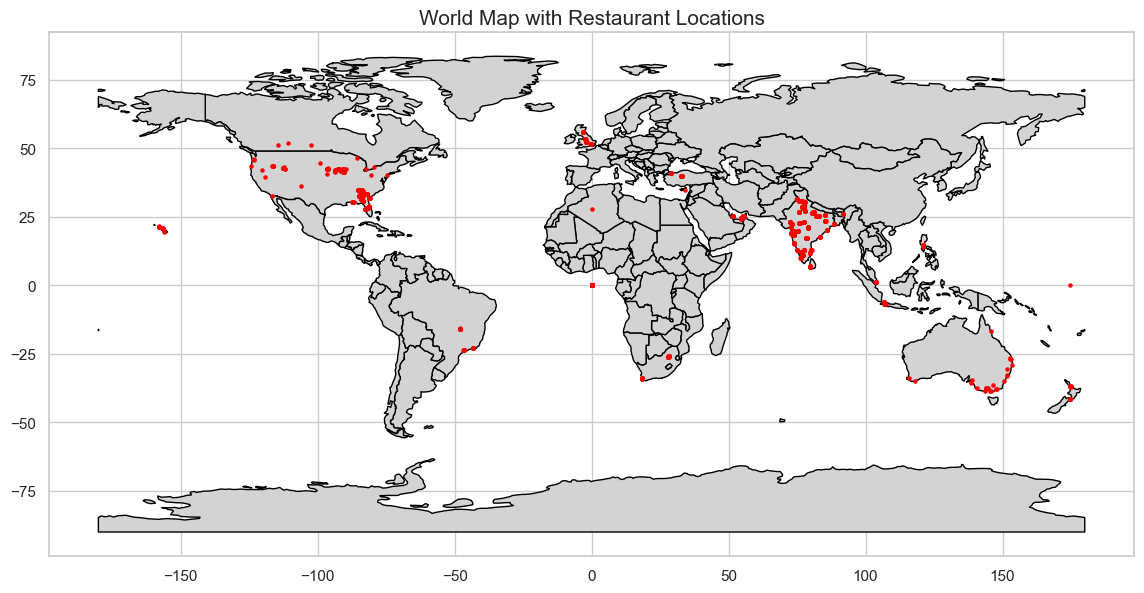

In [46]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import zipfile

# Load the dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# --- Locations of restaurants on a map using latitude and longitude information ---
# Ensure that the necessary columns 'Latitude' and 'Longitude' exist
if {"Latitude", "Longitude"}.issubset(data.columns):
    print("\nGenerating a map of restaurant locations...")
    
    # Create a Folium map centered at the average latitude and longitude
    avg_lat = data["Latitude"].mean()
    avg_lon = data["Longitude"].mean()
    map_restaurants = folium.Map(location=[avg_lat, avg_lon], zoom_start=10)

    # Add markers for each restaurant
    for _, row in data.iterrows():
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Name: {row.get('Restaurant Name', 'Unknown')}<br>Rating: {row.get('Aggregate rating', 'N/A')}",
        ).add_to(map_restaurants)

    # Save the map as an HTML file
    map_restaurants.save("restaurants_map.html")
    print("Map saved as 'restaurants_map.html'. Open it in a browser to view.")
else:
    print("\nError: Columns 'Latitude' and 'Longitude' are required for geospatial visualization.")

# --- Distribution of restaurants across different cities or countries ---
# Distribution of restaurants by City (Top 10 cities)
if "City" in data.columns:
    print("\nDistribution of Restaurants by City:")
    city_counts = data["City"].value_counts().head(10)
    print(city_counts)

    # Plot the distribution for top 10 cities
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data["City"], order=city_counts.index, palette="viridis")
    plt.title("Top 10 Cities with the Most Restaurants")
    plt.xlabel("Number of Restaurants")
    plt.ylabel("City")
    plt.show()

# Distribution of restaurants by Country (Top 10 countries)
if "Country Code" in data.columns:
    print("\nDistribution of Restaurants by Country:")
    country_counts = data["Country Code"].value_counts().head(10)
    print(country_counts)

    # Plot the distribution for top 10 countries
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data["Country Code"], order=country_counts.index, palette="coolwarm")
    plt.title("Top 10 Countries with the Most Restaurants")
    plt.xlabel("Number of Restaurants")
    plt.ylabel("Country Code")
    plt.show()

# --- Analyzing correlation between restaurant's location and its rating ---
if {"Latitude", "Longitude", "Aggregate rating"}.issubset(data.columns):
    print("\nAnalyzing correlation between location and rating...")

    # Create a heatmap of the correlation matrix
    correlation_matrix = data[["Latitude", "Longitude", "Aggregate rating"]].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Between Restaurant's Location and Rating")
    plt.show()
else:
    print("\nError: Columns 'Latitude', 'Longitude', and 'Aggregate rating' are required for correlation analysis.")

# --- Geospatial Visualization with GeoPandas (World Map) ---
# Define the path to the zip file and the extraction directory
zip_file_path = r"C:\Users\HP\Downloads\110m_cultural.zip"
extract_dir = r"C:\Users\HP\Downloads\110m_cultural"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Get the path of the extracted shapefile
shapefile_path = os.path.join(extract_dir, "ne_110m_admin_0_countries.shp")

# Load the shapefile into a GeoDataFrame
world = gpd.read_file(shapefile_path)

# Create a GeoDataFrame for the restaurant locations
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude)
)

# Plot the world map with restaurant locations
fig, ax = plt.subplots(figsize=(14, 12))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_title("World Map with Restaurant Locations", fontsize=15)
plt.show()
